In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataCruceros = pd.read_csv('Cruceros.csv')

dataCruceros

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [3]:
dataCruceros.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


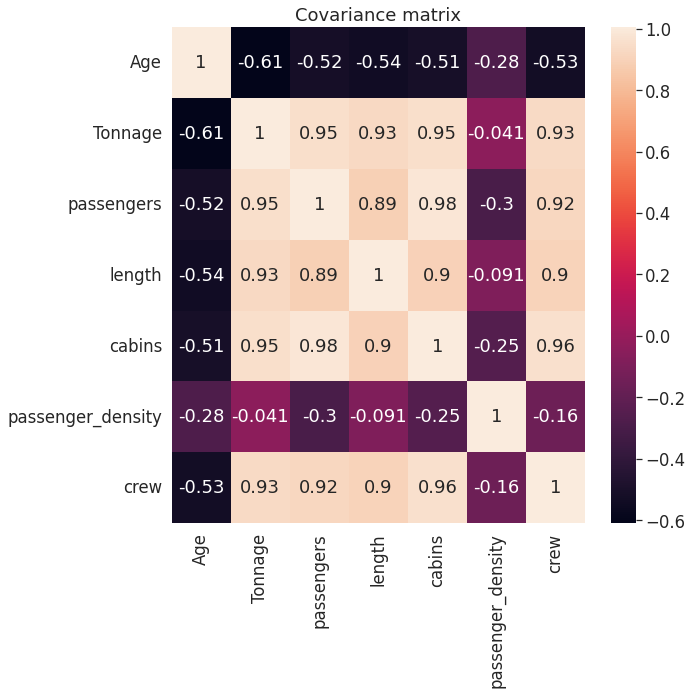

In [4]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(dataCruceros[cols].iloc[:,range(0,7)].values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 annot=True,
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix')
plt.tight_layout()
plt.show()

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_data = pd.DataFrame(encoder.fit_transform(dataCruceros[['Ship_name', 'Cruise_line']]).toarray())
oneHotData = dataCruceros.join(encoder_data)
oneHotData.drop('Ship_name', axis=1, inplace=True)
oneHotData.drop('Cruise_line', axis=1, inplace=True)

oneHotData

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,0,1,2,...,148,149,150,151,152,153,154,155,156,157
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0.59,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
154,14,76.800,19.60,8.79,9.67,39.18,12.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,25,5.350,1.58,4.40,0.74,33.86,0.88,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
156,27,5.350,1.67,4.40,0.74,32.04,0.88,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
from sklearn.model_selection import train_test_split
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
X = oneHotData[cols_selected].iloc[:,0:4].values     
y = oneHotData[cols_selected]['crew']
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.6, test_size=0.4, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
sc_x = StandardScaler()
y_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()

/tmp/ipykernel_38016/4222851631.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
/tmp/ipykernel_38016/4222851631.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()


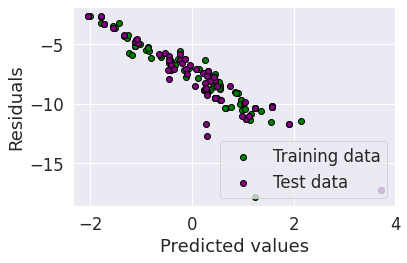

In [8]:
from sklearn import linear_model

alpha = 0.5
ridgeReg = linear_model.Ridge(alpha, fit_intercept=False)
ridgeReg.fit(X_train_std, y_train_std)

y_train_pred = ridgeReg.predict(X_train_std)
y_test_pred = ridgeReg.predict(X_test_std)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='green', edgecolor='black', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='purple', edgecolor='black', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

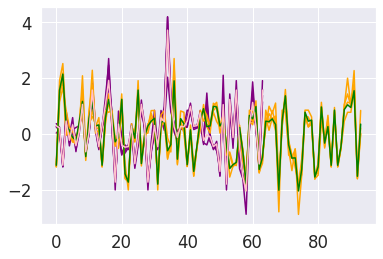

In [9]:
plt.plot(X_test_std, color = 'purple')
plt.plot(X_train_std, color = 'orange')
plt.plot(y_train_pred, color = 'green')
plt.plot(y_test_pred, color = 'pink')

In [10]:
trainPearson = np.corrcoef(X_train)
testPearson = np.corrcoef(X_test)

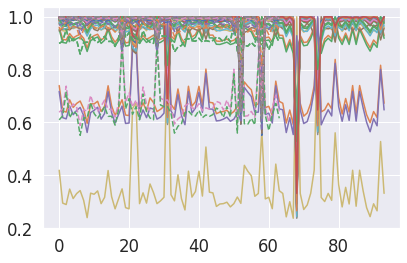

In [11]:
plt.plot(trainPearson)
plt.plot(testPearson, linestyle='--')
plt.tight_layout()
plt.show()